# STAT207 Final Project - Prediction of Sale Price of Residential Homes in Ames, Iowa. 

Donlapun Wongkarnta & Yunfan Hu. 

## 1. Introduction

### Motivation


Supoosed that you are a residential house hunter who finds a house for client that just move to Ames, Iowa. Normally, you client usually have specific preference towards a residential home and the preferred price they want. Many customers usually request a house with central air coniditoning. Therefore, You want to know more how the residential house market in Ames, Iowa is like before you promote houses to your customers. 


In this project, we will be looking at the Ames, Iwoa Housing Dataset (ames.csv). This dataset a (assume random) sample of residential home sales in Ames, Iowa between 2006 to 2010 and properties about the homes and the sale. It contains both numerical and categorical variables. Specifically, we will looking at the following variables:

- Mo_Sold:  Month Sold 
- price: Sale Price (US dollars)
- Yr_Sold: Year Sold
- Year_Built: Year Built
- Overall_Qual: Rates the overall material and finish of the house [1,10] (10 is best)
- Sale_Condition: Condition of sale
    - Normal	Normal Sale
    - Abnorml	Abnormal Sale -  trade, foreclosure, short sale
    - AdjLand	Adjoining Land Purchase
    - Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
    - Family	Sale between family members
    - Partial	Home was not completed when last assessed (associated with New Homes)
- Central_Air: Central air conditioning (Yes/No)
- Garage_Area: Size of garage (square feet)

### Research Questions:
With this dataset, we will try to answer these questions:

1. What is the relationship between the Month Sold(Mo_Sold) and the Sale Price(price) in this Ames, Iwoa Housing Dataset(ames.csv)? And furthermore, how does this relationship between the Month Sold(Mo_Sold) and the Sale Price(price) change for different values of Overall Quality(Overall_Qual)?
    - We will use the desciptive analytics including visualization(histogram, boxplot, etc) and summary statistics(measure of Center, measure of spread) to help answer this question. This question can help us determine as the house hunter to suggest the customers when to buy the houses according to the customers' budget.
    
        
2. Is there an association between the Central air condition(Central_Air) and the Year Built(Year_Built) in all residential homes in Ames, Iwoa?
    - We will conduct an Analysis of Variance (NOVA) Hypothesis to see if there is a different average year built of central air condition. The answer from this question will help us learn more and infer about the relationship between Central air condition(Central_Air) and the Year Built(Year_Built) in all residential homes in Ames, Iwoa. As the house hunter, you might be able to get the idea whether the house would have the central air conditioning based on thethe year it is built.
    
    
3. Is there a linear relationship between the Sale Price(price) and the Overall Quality(Overall_Qual), the Condition of sale (Sale_Condition), the Central air condition(Central_Air), and the Year Built(Year_Built) in the sample? What about in the all residential homes in Ames, Iwoa?
    - We will use the Linear Regression Model to find the linear relationship between responsive variable and explanatory variables. Find the regression model will help us know whether the variables we are considering is likely to fit with the actual outcomes of the Sale Price. As the house hunter, you would be able to predict the sale price of the house which have these factors involved, espeically from the customers' request and use this prediction to give suggestions to the customers.
    
    
4. Is there a linear relationship between the log-odds of the success level of the Central air condition(Central_Air) and the Year Built(Year_Built), the Size of Garage(Garage_Area), the Year Sold(Yr_Sold), and the Sale Price(price) in the sample? What about the all residential homes in Ames, Iwoa? What explanatory variables should we include in the model to build a parsimonious model?
    - We will use the logistic regression to find the answer this question. Finding the explanatory variables will help us get the parsimonious model that not overfitted or underfitted the data. AS the house hunter, you can use this model to predict whether the house has the central air conditioning or not with the new dataset you receive from the market or house provider and gives reccommendations to customers based on this prediction.

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from scipy.stats import t

In [2]:
#Read the ames.csv file into dataframe(df)
df = pd.read_csv("ames.csv")
df.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo_Sold,Yr_Sold,Sale.Type,Sale_Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [3]:
#Set the new dataframe(df_new) that consists of interested variables
df_new = df[['Mo_Sold', 'price', 'Yr_Sold', 'Year_Built', 'Overall_Qual', 'Sale_Condition', 'Central_Air', 'Garage_Area']]
df_new.head()
df_new.shape

(2930, 8)

In [4]:
#Data Cleansing
#Checking the datatype
df_new.dtypes

Mo_Sold             int64
price               int64
Yr_Sold             int64
Year_Built          int64
Overall_Qual        int64
Sale_Condition     object
Central_Air        object
Garage_Area       float64
dtype: object

In [5]:
#Checking for Nan values
df_new.isna().sum()

Mo_Sold           0
price             0
Yr_Sold           0
Year_Built        0
Overall_Qual      0
Sale_Condition    0
Central_Air       0
Garage_Area       1
dtype: int64

In [6]:
df_new['Garage_Area'].unique()

array([ 528.,  730.,  312.,  522.,  482.,  470.,  582.,  506.,  608.,
        442.,  440.,  420.,  393.,  841.,  492.,  834.,  400.,  500.,
        546.,  663.,  480.,  304.,  525.,    0.,  511.,  264.,  320.,
        308.,  751.,  772.,  606.,  868.,  532.,  678.,  820.,  484.,
        958.,  756.,  576.,  474.,  430.,  437.,  433.,  434.,  779.,
        962.,  527.,  712.,  671.,  486.,  666.,  880.,  676.,  614.,
        750.,  618.,  463.,  462.,  457.,  476.,  429.,  539.,  336.,
        280.,  260.,  461.,  564.,  762.,  713.,  588.,  496.,  852.,
        592.,  475.,  596.,  535.,  660.,  441.,  490.,  504.,  517.,
        240.,  364.,  244.,  315.,  578.,  620.,  447.,  294.,  531.,
        263.,  318.,  305.,  246.,  392.,  330.,  720.,  360.,  551.,
        379.,  220.,  780.,  288.,  416.,  624.,  923.,  560.,  363.,
        200.,  572.,  180.,  516.,  672.,  349.,  365.,  231.,  450.,
        270.,  299.,  591.,  533.,  690.,  436.,  586.,  366.,  467.,
        209.,  460.,

In [7]:
df_new.head()

,Mo_Sold,price,Yr_Sold,Year_Built,Overall_Qual,Sale_Condition,Central_Air,Garage_Area
0,5,215000,2010,1960,6,Normal,Y,528.0
1,6,105000,2010,1961,5,Normal,Y,730.0
2,6,172000,2010,1958,6,Normal,Y,312.0
3,4,244000,2010,1968,7,Normal,Y,522.0
4,3,189900,2010,1997,5,Normal,Y,482.0


In [8]:
#Drop row(s) with Nan values
#Final cleaned Dataframe (df_new)
df_new = df_new.dropna()
df_new.shape

(2929, 8)

## 2. Descriptive Analytics

**Research Question**: What is the relationship between the Month Sold(Mo_Sold) and the Sale Price(price) in this Ames, Iwoa Housing Dataset(ames.csv)? And furthermore, how does this relationship between the Month Sold(Mo_Sold) and the Sale Price(price) change for different values of Overall Quality(Overall_Qual)?

Firstly, we visualize the relationship between month the house sold(Mo_Sold) and the sale price(price).

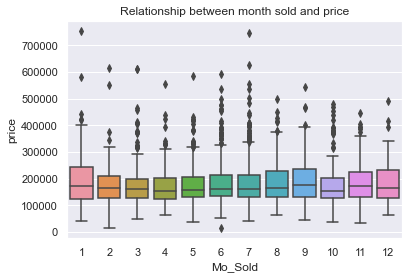

In [9]:
sns.boxplot(x = "Mo_Sold", y = 'price', data = df_new)
plt.title('Relationship between month sold and price')
plt.show()

1. <u>Compare Measures of Center</u>: The median price does not change a lot through the entire year.

2. <u>Compare Outliers</u>: all months have outliers. These outliers are high.

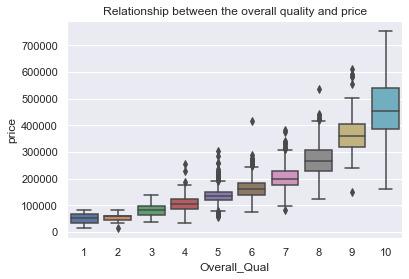

In [10]:
#Visualize the relationship between Overall Quality of the house(Overall_Qual) and the sale price(price)
sns.boxplot(x = "Overall_Qual", y = "price", data = df_new)
plt.title("Relationship between the overall quality and price")
plt.show()

1. <u>Compare Measures of Center</u>: The median price is higher as quality level is higher.

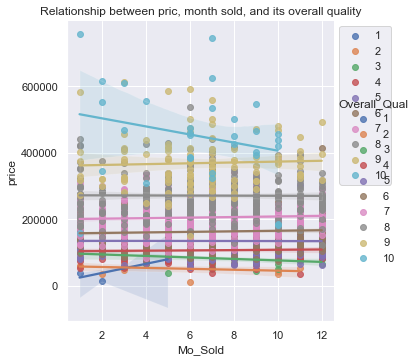

In [11]:
sns.lmplot(x = "Mo_Sold", y = "price", hue = "Overall_Qual", data = df_new)
plt.title('Relationship between pric, month sold, and its overall quality')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

* <u>Intercept Comparison</u>: It looks like the intercept of best fit lines are sorted by the quality level, higher the quality, greater the intercept. 
* <u>Slope Comparison</u>: It looks like the slopes of quality level between 2-9 are similar and very small. However, quality 10 has a negative slope and quality 1 has a positive slope. 
Trend of lines: almost not sgtrong relationship

Intepretation of the statistics
- Based on the statistics summary, the compare measure of center in graph 2 and the intercept comparison in graph 3 indicates the positive relationship between house prcing and the overall quality. 
- Measure of center and slope comparison show that most of the house pricing are not affected by which month it was sold. 
- However, it is necessary to notice that house which has extreme high quality(10) is more likely to be sold in higher price in earlier months; conversely, house which has extreme low quality(1) is more likely to be sold in higher price in later months.

Value of this intepretation
- Therefore, it is easy to provide a reference of price range to our clients who would like to buy a house based on the evaluation of the overall quality. 
- What's more, due to the special property of extreme high and low quality houses, we can choose to sell high quality house in prior to the low quality one.

## 3. Inference

**Research Question**: Is there an association between the Central air condition(Central_Air) and the Year Built(Year_Built) in all residential Homes in Ames, Iowa?

$H_0 :  \mu_1 - \mu_2 = 0$

$H_1 :  \mu_1 - \mu_2 \neq 0$

 where 
 $\mu_1$ is the average year built value for residential homes that has central air condition.
 
 $\mu_2$ is the average year built value for residential homes that doesn't has central air condition.
 
 
 
 
 
 Next, we should check Centrral Limit Theorem conditions (for sample mean differences) to make sure that the decisions that we make with our hypothesis testing procedure are valid.
 
 1. Sample of homes which have central air condition is randomly sampled.
 2. $n_1 = 2734 < 10$ % of all homes that have central air condition in Ames, Iowa.
 3. Sample of homes which do not have central air condition is randonly sampled.
 4. $n_2 = 196 < 10$ % of all homes that do not have central air condition in Ames, Iowa.
 5. $n_1 = 2734 > 30 $
 6. $n_2 = 196 > 30$
 7. We can assume that there is no pairwise relationship between houses in both groups in this sample.
 
 
 
 All of the conditions are met, we can proceed by conducting this hypothesis test.

In [12]:
#Sample size of each population
df_new['Central_Air'].value_counts()

Y    2733
N     196
Name: Central_Air, dtype: int64

In [13]:
df_new['Year_Built'].head()

0    1960
1    1961
2    1958
3    1968
4    1997
Name: Year_Built, dtype: int64

In [14]:
#Sample mean of year built value for residential homes that has central air condition.
mean_y = df_new[df_new['Central_Air'] == 'Y']['Year_Built'].mean()
mean_y

1974.3845590925723

In [15]:
#Sample mean of year built value for residential homes that doesn't has central air condition.
mean_n = df_new[df_new['Central_Air'] == 'N']['Year_Built'].mean()
mean_n

1929.3775510204082

In [16]:
#Sample size of residential homes that have central air condition.
n_y = df_new['Central_Air'].value_counts()[0]

#Sample size of residential homes that do not central air condition.
n_n = df_new['Central_Air'].value_counts()[1]

#Standard deviation of year built value for residential homes that have central air condition.
std_y = df_new[df_new['Central_Air'] == 'Y']['Year_Built'].std()

#Standard deviation of year built value for residential homes that do not central air condition.
std_n = df_new[df_new['Central_Air'] == 'N']['Year_Built'].std()

In [17]:
point_estimate=mean_y-mean_n
print('Point Estimate: ', point_estimate)

Point Estimate:  45.007008072164126


In [18]:
standard_error=np.sqrt((std_y**2)/n_y + (std_n**2)/n_n)
print('Standard Error: ', standard_error)

Standard Error:  1.5939958876111013


In [19]:
test_stat=(point_estimate-0)/standard_error
print('Test statistic (ie. t-score of the point estimate):',test_stat)

Test statistic (ie. t-score of the point estimate): 28.23533512348986


In [20]:
pvalue=2*(1-t.cdf(np.abs(test_stat), df=195))

print('p-value: ',pvalue)

p-value:  0.0


Since p-value = 0, we can suggest that we can reject the null hypothesis, which means that there is an association between the Central air condition(Central_Air) and the Year Built(Year_Built) in all residential homes in Ames, lwoa.

Since there is an association between the Central Air Conditioning(Central_Air) and the Year Built(Built) in all residential homes in Amer, Iowa. We would be able to estimate the approximate year that the houses start changing to have central air conditioning based on the year it is built.

## 4. Linear Regression

### Research Question
Is there a linear relationship between the Sale Price(price) and the Overall Quality(Overall_Qual), the Condition of sale (Sale_Condition), the Central air condition(Central_Air), and the Year Built(Year_Built) in the sample? What about in the all residential homes in Ames, Iwoa?

In [21]:
saleprice_mod = smf.ols('price ~ Overall_Qual + Sale_Condition + Central_Air + Year_Built', data = df_new).fit()
saleprice_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     694.9
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:58:36   Log-Likelihood:                -35658.
No. Observations:                2929   AIC:                         7.133e+04
Df Residuals:                    2920   BIC:                         7.139e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -6.062e+05   7.13e+04     -8.496      0.000   -7.46e+05   -4.66e+05
Sale_Condition[T.AdjLand] -6778.5689   1.41e+04     -0.481      0.631   -3.44e+04    2.09e+04
Sale_Condition[T.Alloca]   1.676e+04   1.04e+04      1.615      0.106   -3584.202    3.71e+04
Sale_Condition[T.Family]  -1315.9882   7725.596     -0.170      0.865   -1.65e+04    1.38e+04
Sale_Condition[T.Normal]   7645.4771   3570.988      2.141      0.032     643.568    1.46e+04
Sale_Condition[T.Partial]  3.038e+04   4837.260      6.281      0.000    2.09e+04    3.99e+04
Central_Air[T.Y]           4315.7593   3806.160      1.134      0.257   -3147.271    1.18e+04
Overall_Qual               3.991e+04    783.351     50.954      0.000    3.84e+04    4.15e+04
Year_Built                  269.2409     37.839      7.115      0.000     195.047     343.435
==============================================================================
Omnibus:                     1113.757   Durbin-Watson:                   1.382
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9602.323
Skew:                           1.563   Prob(JB):                         0.00
Kurtosis:                      11.301   Cond. No.                     1.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$\hat{price}$ = $-6.06*10^{5}$ - 6778.5689Sale_Condition[T.AdjLand] + $1.676*10^{4}$Sale_Condition[T.Alloca] -1315.9882 * Sale_Condition[T.Family] + 7645.4771 * Sale_Condition[T.Normal] + $3.038*10^{4}$Sale_Condition[T.Partial] + 4315.7593Central_Air[T.Y] + $3.991*10^{4}$Overall_Qual + 269.2409Year_Built

### Linear Regression Contions for infrerence for this model.
Next, we would like to check the linear regression conditions in order to make sure that the linear regression model would make accurate inference.

#### Condition 1: Linearity Condition

Because the distribution of points in the plot below does not evenly distributed above and below the line; therefore, the linearity condition is not met.


#### Condition 2: Constant Variability of Residuals Condition
Because the y-axis spread of points in the plot below does not remain the same as we change from left to right; therefore, the constant variability of residuaks condition is not met.

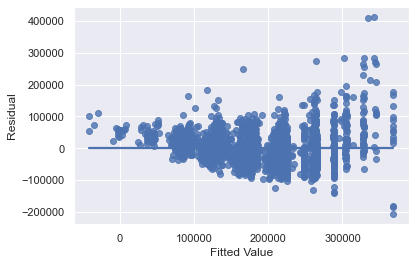

In [22]:
sns.regplot(x = saleprice_mod.fittedvalues, y = saleprice_mod.resid, ci = None)
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.show()

#### Condition 3: Normality of Residuals (with Mean of 0) Condition

Because the histogram of residuals slightly skewed to the right; therefore, the normality of residuals condition is slightly not met. However, the mean is about 0.

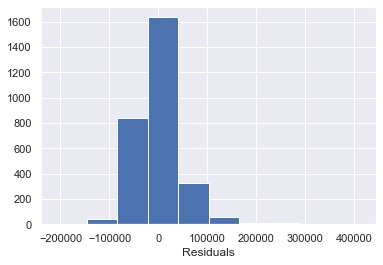

In [23]:
plt.hist(saleprice_mod.resid)
plt.xlabel('Residuals')
plt.show()

#### Condition 4: Independence of Residuals Condition

Since 
- the data is randomly sampled and
- the sample size n = 2929 , 10 % of all residential homes in Ames, Iowa.

Therefore, the Independence of Residuals Condition is met.

#### Condition 5: No Multicollinearity Condition

The multucollinearity condition is not met because there is a moderately strong linear relationship between the Overall Quality variable and the year built variable(R =  0.5969)

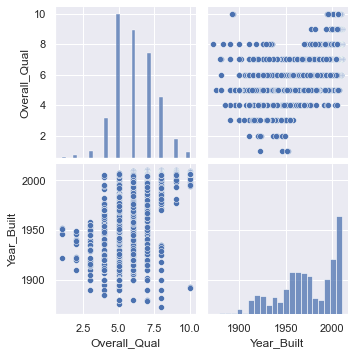

In [24]:
sns.pairplot(df_new[['Overall_Qual', 'Year_Built']])
plt.show()

In [25]:
df_new[['Overall_Qual', 'Year_Built']].corr()

,Overall_Qual,Year_Built
Overall_Qual,1.000000,0.596925
Year_Built,0.596925,1.000000


#### Dropping the multicollinearity explanatory variables
Trying to delete one numerical explanatory variables from the model because the multicollinearity condition is being violated.

According to the $R^2$ below when deleting the each numerical explanatory variables in each model, the model with out the year built (Year_Built) has a higher $R^2$ ($R^2 = 0.6496$). Therefore, we want to delete the year built (Year_Built) variable from the model. 

In [26]:
#deleting the overall quality variable
saleprice_mod = smf.ols('price ~ Sale_Condition + Central_Air + Year_Built', data = df_new).fit()
print("R^2 for the model without Overall_Qual :", saleprice_mod.rsquared)

R^2 for the model without Overall_Qual : 0.3494184742735651


In [27]:
#deleting the year built variable
saleprice_mod = smf.ols('price ~ Overall_Qual + Sale_Condition + Central_Air', data = df_new).fit()
print("R^2 for the model without Year_Built :", saleprice_mod.rsquared)

R^2 for the model without Year_Built : 0.6496483191705891


### Rechecking the Linear Regression Contions for infrerence for this model.
Next, we would like to check the linear regression conditions again after transformations in order to make sure that the linear regression model would make accurate inference.

Transformations:
- Log of sale price (ln(price))
- Deleting the year built (Year_Built) variable

In [28]:
df_new['log_price'] = np.log(df_new['price'])
df_new.head()

,Mo_Sold,price,Yr_Sold,Year_Built,Overall_Qual,Sale_Condition,Central_Air,Garage_Area,log_price
0,5,215000,2010,1960,6,Normal,Y,528.0,12.278393
1,6,105000,2010,1961,5,Normal,Y,730.0,11.561716
2,6,172000,2010,1958,6,Normal,Y,312.0,12.055250
3,4,244000,2010,1968,7,Normal,Y,522.0,12.404924
4,3,189900,2010,1997,5,Normal,Y,482.0,12.154253


In [29]:
#New model with transformation
log_price_mod = smf.ols('log_price ~ Overall_Qual + Sale_Condition + Central_Air', data = df_new).fit()
log_price_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1019.
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:58:38   Log-Likelihood:                 282.66
No. Observations:                2929   AIC:                            -549.3
Df Residuals:                    2921   BIC:                            -501.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    10.3578      0.025    413.207      0.000      10.309      10.407
Sale_Condition[T.AdjLand]     0.0516      0.066      0.782      0.434      -0.078       0.181
Sale_Condition[T.Alloca]      0.1210      0.049      2.489      0.013       0.026       0.216
Sale_Condition[T.Family]      0.0566      0.036      1.563      0.118      -0.014       0.128
Sale_Condition[T.Normal]      0.1197      0.017      7.157      0.000       0.087       0.152
Sale_Condition[T.Partial]     0.1990      0.022      8.899      0.000       0.155       0.243
Central_Air[T.Y]              0.2271      0.017     13.186      0.000       0.193       0.261
Overall_Qual                  0.2189      0.003     68.560      0.000       0.213       0.225
==============================================================================
Omnibus:                      113.685   Durbin-Watson:                   1.466
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.015
Skew:                          -0.203   Prob(JB):                     8.57e-60
Kurtosis:                       4.437   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\hat{ln(price)}$ = 10.3578 + 0.0516Sale_Condition[T.AdjLand] + 0.1210Sale_Condition[T.Alloca] + 0.0566Sale_Condition[T.Family] + 0.1197Sale_Condition[T.Normal] + 0.1990Sale_Condition[T.Partial] + 0.2271Central_Air[T.Y] + 0.2189Overall_Qual

#### Condition 1: Linearity Condition

Because the distribution of points in the plot below is evenly distributed above and below the line; therefore, the linearity condition is met.


#### Condition 2: Constant Variability of Residuals Condition
Because the y-axis spread of points in the plot below has a slightly changes the same as we change from left to right; therefore, the constant variability of residuaks condition is met.

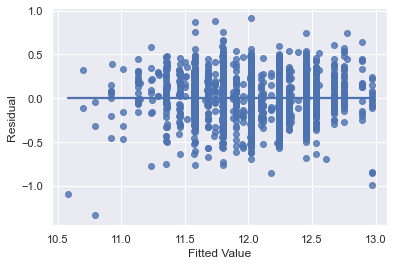

In [30]:
sns.regplot(x = log_price_mod.fittedvalues, y = log_price_mod.resid, ci = None)
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.show()

#### Condition 3: Normality of Residuals (with Mean of 0) Condition

Because the histogram of residuals is normally distributed; therefore, the normality of residuals condition is met (with mean is at about 0).

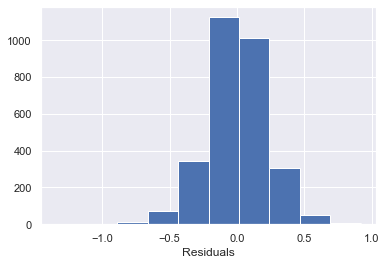

In [31]:
plt.hist(log_price_mod.resid)
plt.xlabel('Residuals')
plt.show()

#### Condition 4: Independence of Residuals Condition

Since 
- the data is randomly sampled and
- the sample size n = 2929 , 10 % of all residential homes in Ames, Iowa.

Therefore, the Independence of Residuals Condition is met.

#### Condition 5: No Multicollinearity Condition

The multicollinearity condition is met because there is only one numerical explanatory variables in the model.

### Model Fit
The percent of variability of this log of sale price explained by this model is 0.709. It is high which means that the model fits with the data.

In [32]:
log_price_mod.rsquared

0.7094162928279473

### Model Prediction
Predict the sale price of the residential home in Ames, Iowa, that is a normal sale, has a central air conditioning, and the overall quality is at 8.

In [33]:
#e ^ y_bar
ln_predict = log_price_mod.predict(exog = dict({'Sale_Condition': 'Normal', 'Central_Air': 'Y', 'Overall_Qual': 8}))
ln_predict

0    12.455459
dtype: float64

In [34]:
print('The predicted sale price (US dollars) of the homes that is a normal sale that has a central air conditioning and the overall quality rate is 8 :', 
      np.exp(ln_predict)[0])

The predicted sale price (US dollars) of the homes that is a normal sale that has a central air conditioning and the overall quality rate is 8 : 256647.56687186437


### Model Inference
Next, we would like to know if we have sufficient evidence to suggest the slopes are non-zero in the population model?

#### Hypothesis
First, we set up the hypothesis tests for this hypothesis test for each slope.

1. $H_0: \beta_1 = 0;$ $H_A: \beta_1 \neq 0$

2. $H_0: \beta_2 = 0;$ $H_A: \beta_2 \neq 0$

3. $H_0: \beta_3 = 0;$ $H_A: \beta_3 \neq 0$

4. $H_0: \beta_4 = 0;$ $H_A: \beta_4 \neq 0$

5. $H_0: \beta_5 = 0;$ $H_A: \beta_5 \neq 0$

6. $H_0: \beta_6 = 0;$ $H_A: \beta_6 \neq 0$

7. $H_0: \beta_7 = 0;$ $H_A: \beta_7 \neq 0$


where 
 - $\beta_1$ = the population slope corresponding to the Sale_Condition[T.AdjLand]
 - $\beta_2$ = the population slope corresponding to the Sale_Condition[T.Alloca]
 - $\beta_3$ = the population slope corresponding to the Sale_Condition[T.Family]
 - $\beta_4$ = the population slope corresponding to the Sale_Condition[T.Normal]
 - $\beta_5$ = the population slope corresponding to the Sale_Condition[T.Partial]
 - $\beta_6$ = the population slope corresponding to the Central_Air[T.Y]
 - $\beta_7$ = the population slope corresponding to the Overall_Qual


#### Test statistics and p-value

From the summary output table, the test statistics and p-value for each slope are displayed below:

In [35]:
log_price_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1019.
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:58:38   Log-Likelihood:                 282.66
No. Observations:                2929   AIC:                            -549.3
Df Residuals:                    2921   BIC:                            -501.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    10.3578      0.025    413.207      0.000      10.309      10.407
Sale_Condition[T.AdjLand]     0.0516      0.066      0.782      0.434      -0.078       0.181
Sale_Condition[T.Alloca]      0.1210      0.049      2.489      0.013       0.026       0.216
Sale_Condition[T.Family]      0.0566      0.036      1.563      0.118      -0.014       0.128
Sale_Condition[T.Normal]      0.1197      0.017      7.157      0.000       0.087       0.152
Sale_Condition[T.Partial]     0.1990      0.022      8.899      0.000       0.155       0.243
Central_Air[T.Y]              0.2271      0.017     13.186      0.000       0.193       0.261
Overall_Qual                  0.2189      0.003     68.560      0.000       0.213       0.225
==============================================================================
Omnibus:                      113.685   Durbin-Watson:                   1.466
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.015
Skew:                          -0.203   Prob(JB):                     8.57e-60
Kurtosis:                       4.437   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion

Using a significant level $\alpha = 0.05$:

For hypothesis test 1($\beta_1$): Because the p-value = 0.434 $> \alpha = 0.05$, we fail to reject the null hypothesis.

For hypothesis test 2($\beta_2$): Because the p-value = 0.013 $< \alpha = 0.05$, we reject the null hypothesis.

For hypothesis test 3($\beta_3$): Because the p-value = 0.118 $> \alpha = 0.05$, we fail to reject the null hypothesis.

For hypothesis test 4($\beta_4$): Because the p-value = 0.000 $< \alpha = 0.05$, we reject the null hypothesis.

For hypothesis test 5($\beta_5$): Because the p-value = 0.000 $< \alpha = 0.05$, we reject the null hypothesis.

For hypothesis test 6($\beta_6$): Because the p-value = 0.000 $< \alpha = 0.05$, we reject the null hypothesis.

For hypothesis test 7($\beta_7$): Because the p-value = 0.000 $< \alpha = 0.05$, we reject the null hypothesis.

Therefore, the slopes of Sale_Condition[T.Alloca], Sale_Condition[T.Normal], Sale_Condition[T.Partial], Central_Air[T.Y], and Overall_Qual have sufficient evidence to suggest that they are non-zero in the model.

### Linear Regression Analysis and Research Question.
This linear regression analysis helps us determine whether te Overall Quality(Overall_Qual), the COndition of Sale(Sale_Condition), the Central Air Conditioning(Central_air), and the Year Built(Year_Built) affects the Sale Price or not. From the analysis, we found that without the year built(Year_Built) variable, the model can explain more of the variability of the Sale Price(price). Therefore, considering these variables, there is a linear relationship between the  Sale Price(price) and the Overall Quality(Overall_Qual), the Condition of sale (Sale_Condition), the Central air conditioning(Central_Air). 

As the residential house hunter, we can predict the sale price of the residential home based on the Overall Quality , the Condition of Sale, and the Central Conditioning which would also be the specification requested by the customers as they are looking for homes.

## 5. Logistic Regression

**Research Question:** Is there a linear relationship between the log-odds of the success level of the Central air condition(Central_Air) and the Year Built(Year_Built), the Size of Garage(Garage_Area), the Year Sold(Yr_Sold), and the Sale Price(price) in the sample? What about the all residential homes in Ames, Iwoa? What explanatory variables should we include in the model to build a parsimonious model?

In [36]:
# Creating 0/1 responsive numerical variable from categorical variable(Central_air) into df_new dataframe
df_new['numer_air'] = df_new['Central_Air'].map({'Y': 1, 'N': 0})
df_new.head()

,Mo_Sold,price,Yr_Sold,Year_Built,Overall_Qual,Sale_Condition,Central_Air,Garage_Area,log_price,numer_air
0,5,215000,2010,1960,6,Normal,Y,528.0,12.278393,1
1,6,105000,2010,1961,5,Normal,Y,730.0,11.561716,1
2,6,172000,2010,1958,6,Normal,Y,312.0,12.055250,1
3,4,244000,2010,1968,7,Normal,Y,522.0,12.404924,1
4,3,189900,2010,1997,5,Normal,Y,482.0,12.154253,1


### Creating the Training and Test dataset
where 
- the training dataset is comprised of a random sample of 80% of the rows in our dataframe,
- the test dataset is comprised of the remaining 20% of rows in the dataframe, and
- we use a random state of 100.

In [37]:
#Creating training and test dataset
dfnew_train, dfnew_test = train_test_split(df_new, test_size = 0.2, random_state = 100)
dfnew_train

,Mo_Sold,price,Yr_Sold,Year_Built,Overall_Qual,Sale_Condition,Central_Air,Garage_Area,log_price,numer_air
455,7,230000,2009,2007,7,Normal,Y,626.0,12.345835,1
1011,6,325000,2008,2005,9,Normal,Y,656.0,12.691580,1
1863,9,143450,2007,1968,6,Normal,Y,412.0,11.873742,1
1886,7,106500,2007,1959,5,Normal,Y,294.0,11.575900,1
1833,4,285000,2007,1992,8,Normal,Y,541.0,12.560244,1
...,...,...,...,...,...,...,...,...,...,...
1930,7,142000,2007,1953,5,Normal,Y,336.0,11.863582,1
79,2,194500,2010,1993,7,Normal,Y,457.0,12.178187,1
1859,5,181500,2007,1976,6,Normal,Y,460.0,12.109011,1
2841,9,83000,2006,1922,4,Abnorml,N,0.0,11.326596,0


In [38]:
dfnew_test

,Mo_Sold,price,Yr_Sold,Year_Built,Overall_Qual,Sale_Condition,Central_Air,Garage_Area,log_price,numer_air
134,1,178000,2010,1966,6,Normal,Y,315.0,12.089539,1
583,6,206000,2009,1974,7,Normal,Y,784.0,12.235631,1
1099,6,315000,2008,1998,8,Normal,Y,696.0,12.660328,1
1658,6,175000,2007,1968,6,Normal,Y,539.0,12.072541,1
773,6,149900,2009,1978,6,Normal,Y,504.0,11.917724,1
...,...,...,...,...,...,...,...,...,...,...
503,10,263550,2009,1993,8,Normal,Y,623.0,12.481998,1
1023,11,161000,2008,1976,6,Normal,Y,461.0,11.989160,1
1984,5,85000,2007,1900,4,Normal,N,252.0,11.350407,0
1187,10,150000,2008,1968,6,Family,Y,512.0,11.918391,1


### Backward Elimination

Next, starting with the full model, use a backwards elimination algorithm that seeks to find the model with the lowest AIC score. We will fit each model with training dataset.

In [39]:
#Starting with full model.Setting full model = current model
current_model = smf.logit('numer_air ~ Year_Built + Garage_Area + Yr_Sold + price', data = dfnew_train).fit()
current_model.aic

Optimization terminated successfully.
         Current function value: 0.147280
         Iterations 11


700.1537450392152

In [40]:
#Delete the year built(Year_Built) variable
test_mod = smf.logit('numer_air ~ Garage_Area + Yr_Sold + price', data = dfnew_train).fit()
test_mod.aic

Optimization terminated successfully.
         Current function value: 0.163397
         Iterations 10


773.6785549120447

In [41]:
#Delete the size of garage(Garage_Area) variable
test_mod = smf.logit('numer_air ~ Year_Built + Yr_Sold + price', data = dfnew_train).fit()
test_mod.aic

Optimization terminated successfully.
         Current function value: 0.149772
         Iterations 11


709.8319207777002

In [42]:
#Delete the year sold(Yr_Sold) variable
test_mod = smf.logit('numer_air ~ Year_Built + Garage_Area + price', data = dfnew_train).fit()
test_mod.aic

Optimization terminated successfully.
         Current function value: 0.147284
         Iterations 9


698.1732280222712

In [43]:
#Delete the sale price(price) variable
test_mod = smf.logit('numer_air ~ Year_Built + Garage_Area + Yr_Sold', data = dfnew_train).fit()
test_mod.aic

Optimization terminated successfully.
         Current function value: 0.166249
         Iterations 10


787.0425404298459

In [44]:
#Lowest aic is at the model without the year sold(Yr_Sold) variable. 
#Current model = model without the year sold(Yr_Sold) variable.
current_mod = smf.logit('numer_air ~ Year_Built + Garage_Area + price', data = dfnew_train).fit()
current_mod.aic

Optimization terminated successfully.
         Current function value: 0.147284
         Iterations 9


698.1732280222712

In [45]:
#Delete the Year Built(Year_Built) variable
test_mod = smf.logit('numer_air ~ Garage_Area + price', data = dfnew_train).fit()
test_mod.aic

Optimization terminated successfully.
         Current function value: 0.163398
         Iterations 9


771.6853042411369

In [46]:
#Delete the size of gaarge(Garage.Area) variable
test_mod = smf.logit('numer_air ~ Year_Built + price', data = dfnew_train).fit()
test_mod.aic

Optimization terminated successfully.
         Current function value: 0.149776
         Iterations 9


707.848489134353

In [47]:
#Delete the sale price(price) variable
test_mod = smf.logit('numer_air ~ Year_Built + Garage_Area', data = dfnew_train).fit()
test_mod.aic

Optimization terminated successfully.
         Current function value: 0.166252
         Iterations 9


785.0566954596227

In [48]:
#After deleting each varible from the current model, none of those models has lower aic score.
#Therefore, the finla model wis the current model(without the year sold(Yr_sold))
final_mod = smf.logit('numer_air ~ Year_Built + Garage_Area + price', data = dfnew_train).fit()
final_mod.aic

Optimization terminated successfully.
         Current function value: 0.147284
         Iterations 9


698.1732280222712

### Fitting final parsimonious logistic regression model with the training dataset

In [49]:
final_mod = smf.logit('numer_air ~ Year_Built + Garage_Area + price', data = dfnew_train).fit()
final_mod.summary()

Optimization terminated successfully.
         Current function value: 0.147284
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              numer_air   No. Observations:                 2343
Model:                          Logit   Df Residuals:                     2339
Method:                           MLE   Df Model:                            3
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.3868
Time:                        19:58:39   Log-Likelihood:                -345.09
converged:                       True   LL-Null:                       -562.73
Covariance Type:            nonrobust   LLR p-value:                 5.044e-94
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -71.3706      8.228     -8.674      0.000     -87.498     -55.243
Year_Built      0.0356      0.004      8.336      0.000       0.027       0.044
Garage_Area     0.0018      0.001      3.331      0.001       0.001       0.003
price        3.051e-05   3.65e-06      8.359      0.000    2.34e-05    3.77e-05
===============================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

$\hat{numer\_air}$ = -71.3706 + 0.0356Year_Built + 0.0018Garage_Area + $3.051 * 10 ^ {- 5}$price

### Hypothesis Testing for the Population Slopes
Next, we would like to test if we have enough evidence to suggest that is there any slope in the final model are non-zero?

#### Hypothesis
First, we set up the hypothesis tests for this hypothesis test for each slope.

1. $H_0: \beta_1 = 0;$ $H_A: \beta_1 \neq 0$

2. $H_0: \beta_2 = 0;$ $H_A: \beta_2 \neq 0$

3. $H_0: \beta_3 = 0;$ $H_A: \beta_3 \neq 0$


where 
 - $\beta_1$ = the population slope corresponding to the Year_Built
 - $\beta_2$ = the population slope corresponding to the Garage_Area
 - $\beta_3$ = the population slope corresponding to the price



#### Test statistics and p-value

From the summary output table, the test statistics and p-value for each slope are displayed below:

In [50]:
final_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              numer_air   No. Observations:                 2343
Model:                          Logit   Df Residuals:                     2339
Method:                           MLE   Df Model:                            3
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.3868
Time:                        19:58:39   Log-Likelihood:                -345.09
converged:                       True   LL-Null:                       -562.73
Covariance Type:            nonrobust   LLR p-value:                 5.044e-94
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -71.3706      8.228     -8.674      0.000     -87.498     -55.243
Year_Built      0.0356      0.004      8.336      0.000       0.027       0.044
Garage_Area     0.0018      0.001      3.331      0.001       0.001       0.003
price        3.051e-05   3.65e-06      8.359      0.000    2.34e-05    3.77e-05
===============================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### Conclusion

Using a significant level $\alpha = 0.05$:

For hypothesis test 1($\beta_1$): Because the p-value = 0.434 $< \alpha = 0.05$, we reject the null hypothesis.

For hypothesis test 2($\beta_2$): Because the p-value = 0.013 $< \alpha = 0.05$, we reject the null hypothesis.

For hypothesis test 3($\beta_3$): Because the p-value = 0.118 $< \alpha = 0.05$, we reject the null hypothesis.


Therefore, the slopes of Year_Built, Garage_Area, and price have sufficient evidence to suggest that they are non-zero in the model.

### ROC and AUC of the Model

Next, we would like to create a ROC curve and calculateing the AUC for the logistic regression model, using the test dataset.

In [51]:
dfnew_test['phat_test'] = final_mod.predict(exog = dfnew_test)
dfnew_test.head()

<ipython-input-51-110d4a5d3617>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew_test['phat_test'] = final_mod.predict(exog = dfnew_test)


,Mo_Sold,price,Yr_Sold,Year_Built,Overall_Qual,Sale_Condition,Central_Air,Garage_Area,log_price,numer_air,phat_test
134,1,178000,2010,1966,6,Normal,Y,315.0,12.089539,1,0.990834
583,6,206000,2009,1974,7,Normal,Y,784.0,12.235631,1,0.998755
1099,6,315000,2008,1998,8,Normal,Y,696.0,12.660328,1,0.999978
1658,6,175000,2007,1968,6,Normal,Y,539.0,12.072541,1,0.993792
773,6,149900,2009,1978,6,Normal,Y,504.0,11.917724,1,0.990064


In [52]:
#Creating fpr, tpr, score, and auc
fpr_final_mod, tpr_final_mod, score_final_mod = roc_curve(y_true = dfnew_test['numer_air'], y_score = dfnew_test['phat_test'])
auc_final_mod = roc_auc_score(y_true = dfnew_test['numer_air'], y_score = dfnew_test['phat_test'])

In [53]:
#function 
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

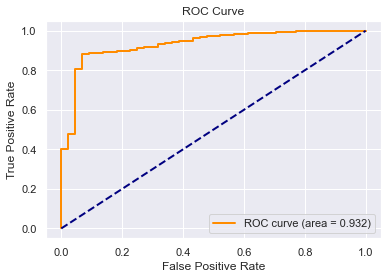

In [54]:
#Plot and display ROC and AUC
plot_roc(fpr_final_mod, tpr_final_mod, auc_final_mod)

### Predictive Probability Threshold Selection
Ideally, we would choose the predictive probability threshold that has the false positive rate of 0 and true positive rate of 1. 

From the ROC curve, the good predictive probability threshold is the one that is close to the ideal predictive probability threshold(FPR = 0, TPR = 1). Therefore, We will choose predictive probability threshold correpsonds to the TPR = 0.83 and FPR = 0.04 because we want the classify many residential homes that have central air conditioning as possible(high tpr) and avoid giving wrong suggestions about central air conditioning to customers(low fpr). Furthermore, there would be less penalty for giving wrong suggestions because when people are looking for homes, they would look at many different places which the provider can give them more options.

## Logistic Regression Analysis and the Research Question.
Logistic regression analysis helps us find the parsimonious model which determine which explanatory variables should be included in the model in order to predict the log-odds of the success level of the Central Air Conditioning(Central_Air) based on the interested variables we have which are the Year Built(Year_Built), the Size of Garage(Garage_Area), the Year Sold(Yr_Sold), and the Sale Price(price). From the analysis, we found that the final parsimonious model does not include the Year Sold(Yr_Sold) variable. Furthermore, the final model would be able to make a better prediction for new datasets.

As the residential house hunter, when the customers request the house with central air conditioning as the main interest, you would be able to make the prediction whether the house has the central conditioning or not based on these explanatory variables: Year_Built, Garage_Area, price. Furtermore, after the ROC and AUC from this final model with test dataset shows that the model can identify many residential homes with central conditioning(TPR = 0.83), even though it also wrongly identifies some homes as having central air conditioning(FPR = 0.04). Wrongly identify homes with central air conditioning might reduce the credibitlty of house hunter; however, it could be mitigate by providing many options towards customers. 

## 6. Conclusion

### Summarization
After conducting all four research questions, the findings are as following:
- Question 1: What is the relationship between the Month Sold(Mo.Sold) and the Sale Price(price) in this Ames, Iwoa Housing Dataset(ames.csv)? And furthermore, how does this relationship between the Month Sold(Mo_Sold) and the Sale Price(price) change for different values of Overall Quality(Overall_Qual)?
    - There’s a positive relationship between house prcing and the overall quality. Most of price of the houses are not affected by which month it was sold. Houses which have extreme high quality is more likely to be sold in higher price in earlier months; conversely, houses which have extreme low quality(1) is more likely to be sold in higher price in later months.



- Question 2: Is there an association between the Central air condition(Central_Air) and the Year Built(Year_Built) in all residential homes in Ames, Iwoa?
    - There is a strong association between whether the house has air condition and the it was built in all residential homes in Ames, lwoa.
    
    
    
- Question 3: Is there a linear relationship between the Sale Price(price) and the Overall Quality(Overall_Qual), the Condition of sale (Sale_Condition), the Central air condition(Central_Air), and the Year Built(Year_Built) in the sample? What about in the all residential homes in Ames, Iwoa?
    - There is a linear relationship between the Sale Price(price) and the Overall Quality(Overall.Qual), the Condition of Sale (Sale_Condition), and the Central Air Conditioning(Central_Air) in the sample. The Year Built(Year_Bult) is not included in the linear relationship because it creates the multicollinearity with other variables. The model created based on this relationship has a high precent of variablity(R^2) which could have good prediction for all residential homes in Ames, Iowa.
    
    
    
- Question 4: Is there a linear relationship between the log-odds of the success level of the Central air condition(Central_Air) and the Year Built(Year_Built), the Size of Garage(Garage_Area), the Year Sold(Yr_Sold), and the Sale Price(price) in the sample? What about the all residential homes in Ames, Iwoa? What explanatory variables should we include in the model to build a parsimonious model?
    - There is a linear relationship between the log-odds of the success level of the Central air condition(Central_Air) and the Year Built(Year_Built), the Size of Garage(Garage_Area), and the Sale Price(price) in the sample. The Year Sold(Yr_Sold) variables is deleted from the relationship and the model to make the model more parsimonious (lowest AIC socre). The model  can identify 83% of the residential homes with central air conditiong and falsely identify 4% of residential homes with central air conditioning based on the test dataset. This testing means that the model could identify a high number of homes with central air conditioning and have small false idntification in all residential homes in Ames, Iowa.

### Future Work

For future work based on these analyses, the research questions could included more explanatory variables that might influence the interested responsive variables. Furthermore, these analyses mainly focus on the sale price and the central air conditioning which tries to satisfy the request from customers. The further work could also focus on other variables such as the Overall Quality which usually be a potential criteria of customer's preferences. Thse analyses could also extends to the building construction field where the architectures and the real estate come together to determine which explanatory variables could the a potential consideration when they are planning to build residential homes in Ames, Iowa.